<a href="https://colab.research.google.com/github/JigarT10/ANN/blob/main/Classification%20MNIST/Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
X_test.shape

(10000, 28, 28)

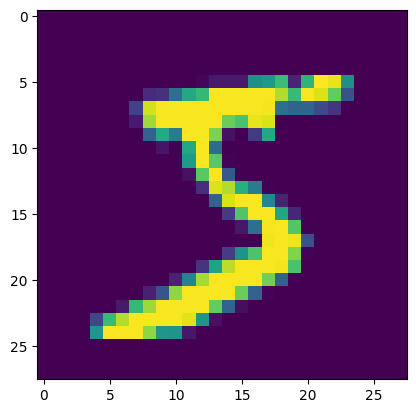

In [11]:
plt.imshow(X_train[0])

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-tr

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 11s 4ms/step - loss: 1.1439 - accuracy: 0.6219 - val_loss: 0.5200 - val_accuracy: 0.8529
Epoch 2/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5744 - accuracy: 0.8220 - val_loss: 0.3780 - val_accuracy: 0.8898
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4629 - accuracy: 0.8616 - val_loss: 0.3128 - val_accuracy: 0.9087
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4060 - accuracy: 0.8802 - val_loss: 0.2768 - val_accuracy: 0.9178
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3611 - accuracy: 0.8945 - val_loss: 0.2471 - val_accuracy: 0.9268
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3341 - accuracy: 0.9022 - val_loss: 0.2270 - val_accuracy: 0.9330
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3079 - accuracy: 0.9084 - val_loss: 0.2086 - val_a

In [17]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.1014 - accuracy: 0.9735


[0.10144731402397156, 0.9735000133514404]

In [18]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9735

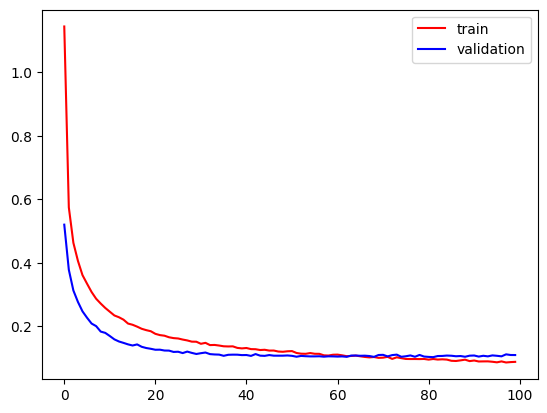

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

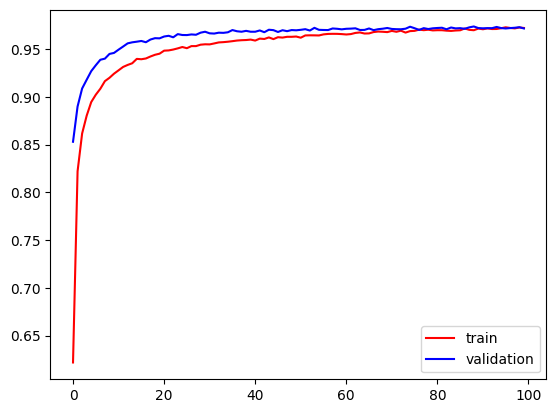

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

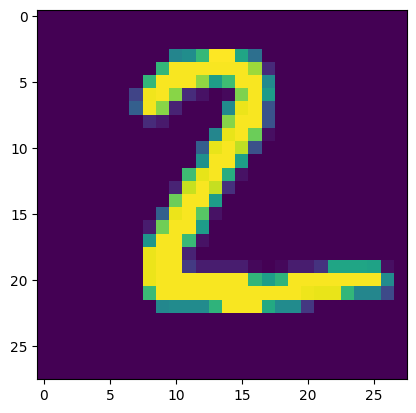

In [23]:
plt.imshow(X_test[1])

In [24]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([2])